Wybieramy temat. Może być to temat z poprzedniego projektu – o ile nie będzie realizować 
tego samego lub podobnego projektu trzeci raz.  
2. Wyznaczamy zmienną celu. 
3. Dokonujemy eksploracji zbioru. Uzupełniamy braki danych. Dokonujemy wstępnej selekcji 
zmiennych.  
4. Dzielimy zbiór danych na treningowy testowy i w miarę możliwości na walidacyjny. 
5. Tworzymy różnego rodzaju modele sieci neuronowych – sprawdzając różne możliwe 
parametry. 
6. Porównujemy i wybieramy najlepszy model. 
7. Dokonujemy ostatecznej oceny wybranego modelu na zbiorze walidacyjnym. 
8. Porównujemy rozwiązanie z przynajmniej jednym, poznanym modelem w bloku ML. 
9. Wskazujemy uzysk dla firmy / odbiorcy (np. ile pieniędzy z tego będzie miała, jak 
wdrożenie wpłynie na rozpoznawalność przypadków, dla których firma wykona działania 
prewencyjne itd.) – to jest bardzo ważny punkt. 
10.  Budujemy aplikację wykorzystującą model. 
11.  Na prezentacji powinna znaleźć się krótka analiza zmiennych, omówienie wyników 
wszystkich zastosowanych technik modelowania i ich porównanie, wybór modelu i przede 
wszystkim wartość dodana jaką niesie za sobą wdrożenie.

W końcu inny mnist • rozpoznawanie gestów • aplikacja działająca real-time pozwalająca zrozumieć co chce przekazać niema osoba • typ zadania: klasyfikacja zdjęć • Sign Language MNIST

In [24]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# import zipfile
# from sklearn.metrics import classification_report

In [25]:
#Lets read the training data
df=pd.read_csv('data\sign_mnist_train.csv')

In [26]:
#Lets explore data. There is nearly 25000 samples, with 784 features (pixels) and 1 label.
display(df.columns)
display(df.head())

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [27]:
#Function to draw pictures and print labels

def show_picture(no_list: list, df, label):
    ''' Function prints pictures from df and labels from df for items in no_list.
        Example use: show_picture([0,1,2,3,4],df.drop(columns='label'),df['label']) will print & paint pictures 0..4 from df
        '''
    plt.gray()
    for no_ in no_list:
        img=df.iloc[no_,:] #take 1 row with number no_ as image
        img_label=label[no_] #take 1 label with number no_ as label
        plt.imshow(img.to_numpy().reshape(28,28)) #draw picture - not sure if we need to make it numpy and reshape
        plt.title(img_label)
        plt.show()

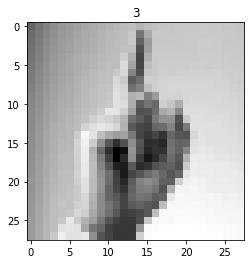

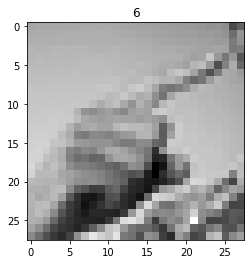

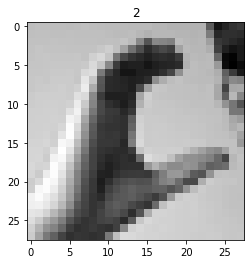

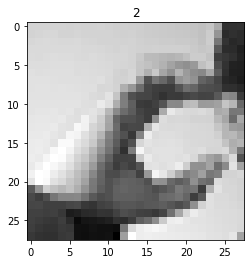

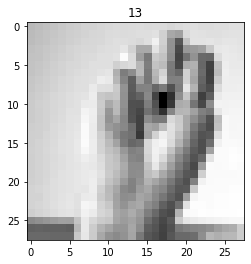

In [28]:
#Lets use th function
show_picture([0,1,2,3,4],df.drop(columns='label'),df['label'])

In [29]:
#define features and target
x=df.drop(columns='label')
y=df['label']

# #reshape features into picture like structure & scale 
# x=x.to_numpy()
# x=x.reshape(27455,28,28)/255

In [34]:
#Split data in test & train
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2,stratify=y)

print('Shapes of x_train and y_train: ',x_train.shape,y_train.shape)
print('Shapes of x_val and y_val: ',x_val.shape,y_val.shape)

print('y_train values :', np.sort(y_train.unique()))
print('y_val values :',np.sort(y_val.unique()))

Shapes of x_train and y_train:  (21964, 784) (21964,)
Shapes of x_val and y_val:  (5491, 784) (5491,)
y_train values : [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
y_val values : [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [35]:
# Define  & train the model
model1 = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(25, activation='softmax')
])

# Print the model summary
model1.summary()

# Use same settings
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING & VALIDATION:')
history= model1.fit(x_train.to_numpy().reshape(x_train.shape[0],28,28)/255, y_train, epochs=5,validation_data=(x_val.to_numpy().reshape(x_val.shape[0],28,28)/255,y_val))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [37]:
class_=1                                    #pick one of the integers 0-24 representing one letter
class_list= y_train[y_train==class_].index        #build a list of rows ids of samples belonging to selected class

class_list

Int64Index([21239, 23375, 22007,  3041, 17315,  8966,  4244,  9019,   117,
             2387,
            ...
             3209,  9502, 14107, 15515, 27071,  4143,  5386, 22035, 23584,
              958],
           dtype='int64', length=808)

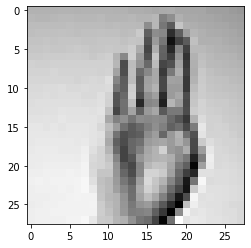

sample no:  21239
model prediciton: 1
actual label: 1


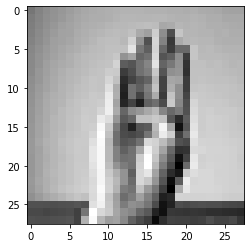

sample no:  23375
model prediciton: 1
actual label: 1


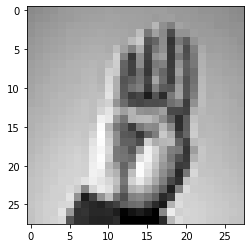

sample no:  22007
model prediciton: 1
actual label: 1


In [54]:
#Lets see what the label of picture is and what the prediction is on training set

#pick a picture class here and you will see ten items of it visualized
class_=1                                          #pick one of the integers 0-24 representing one letter in sign language
class_list= y_train[y_train==class_].index        #build a list of indexes where this class is present

#print picture, predicted and actual value in loop. Use i to change how many loops are made
for i,val in enumerate(class_list):
    if i<3:                                 #we will show only first 5 predictions and actual
        plt.imshow(x_train.loc[val,:].to_numpy().reshape(28,28))            #show picture with id 
        plt.show()
        print('sample no: ', val)           #show position
        print('model prediciton:',model1.predict(x_train.loc[val,:].to_numpy().reshape(1,28,28,1),verbose=0).argmax()) #show model prediction
        print('actual label:',y_train.loc[val])                                                       #show class  
    else:
        pass

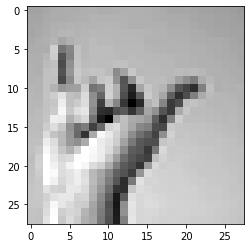

sample no:  7257
model prediciton: 24
actual label: 24


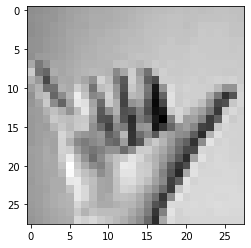

sample no:  16122
model prediciton: 24
actual label: 24


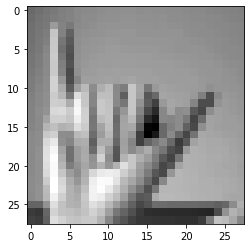

sample no:  20474
model prediciton: 24
actual label: 24


In [56]:
#pick a picture class here and you will see ten items of it visualized
class_= 24                                          #pick one of the integers 0-24 representing one letter in sign language
class_list= y_val[y_val==class_].index        #build a list of indexes where this class is present

#print picture, predicted and actual value in loop. Use i to change how many loops are made
for i,val in enumerate(class_list):
    if i<3:                                 #we will show only first 5 predictions and actual
        plt.imshow(x_val.loc[val,:].to_numpy().reshape(28,28))            #show picture with id 
        plt.show()
        print('sample no: ', val)           #show position
        print('model prediciton:',model1.predict(x_val.loc[val,:].to_numpy().reshape(1,28,28,1),verbose=0).argmax()) #show model prediction
        print('actual label:',y_val.loc[val])

numpy.ndarray

(28, 28, 3)

(28, 28)

model prediciton: 24
actual label: 0


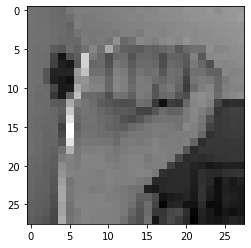

In [57]:
img = cv2.imread("real_data/pic.png")
display(type(img))
display(img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(gray.shape)

plt.imshow(gray)
print('model prediciton:',model1.predict(gray.reshape(1,28,28,1),verbose=0).argmax())
print('actual label:',0)
